## Step 1: Clone Dataset to Local

In [2]:
!git clone https://github.com/Cee/CV-Assignment-1-Dataset.git
!cd CV-Assignment-1-Dataset && git pull

Cloning into 'CV-Assignment-1-Dataset'...
remote: Counting objects: 31, done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 31 (delta 8), reused 27 (delta 4), pack-reused 0
Unpacking objects: 100% (31/31), done.
Already up-to-date.


## Step 2: Install OpenCV-Python via `apt-get`

In [3]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

Selecting previously unselected package libxext6:amd64.
(Reading database ... 16669 files and directories currently installed.)
Preparing to unpack .../libxext6_2%3a1.3.3-1_amd64.deb ...
Unpacking libxext6:amd64 (2:1.3.3-1) ...
Selecting previously unselected package x11-common.
Preparing to unpack .../x11-common_1%3a7.7+19ubuntu3_all.deb ...
Unpacking x11-common (1:7.7+19ubuntu3) ...
Selecting previously unselected package libice6:amd64.
Preparing to unpack .../libice6_2%3a1.0.9-2_amd64.deb ...
Unpacking libice6:amd64 (2:1.0.9-2) ...
Selecting previously unselected package libsm6:amd64.
Preparing to unpack .../libsm6_2%3a1.2.2-1_amd64.deb ...
Unpacking libsm6:amd64 (2:1.2.2-1) ...
Setting up libxext6:amd64 (2:1.3.3-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up x11-common (1:7.7+19ubuntu3) ...
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.

## Step 3: Compute a Histogram and CDF

In [4]:
!ls CV-Assignment-1-Dataset

chang.png	      cocoa.png					Hist1.jpg
checker128-var20.png  crowd.png					Hist2.jpg
checker196-var20.png  CS 6643 Computer Vision Spring18-HW1.pdf	Homework.tex
chino.png	      CTscan.jpg				images


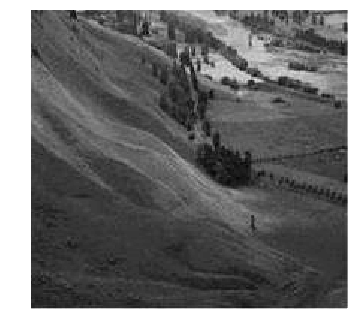

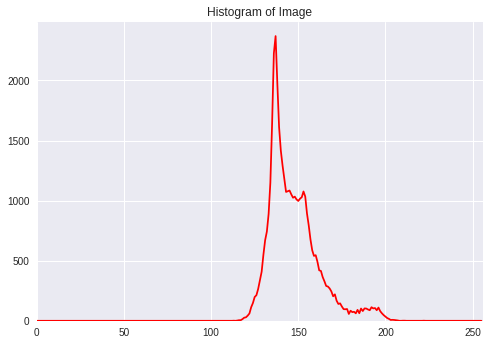

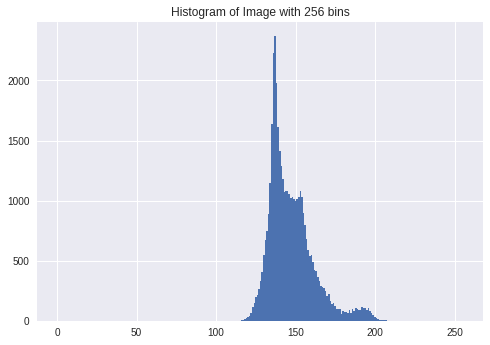

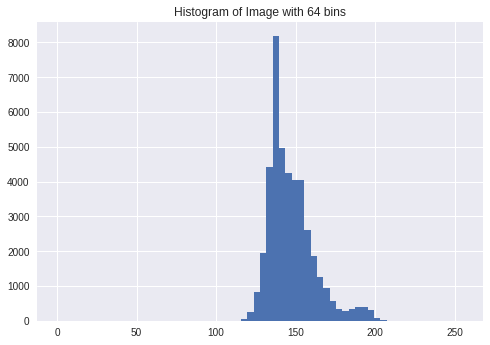

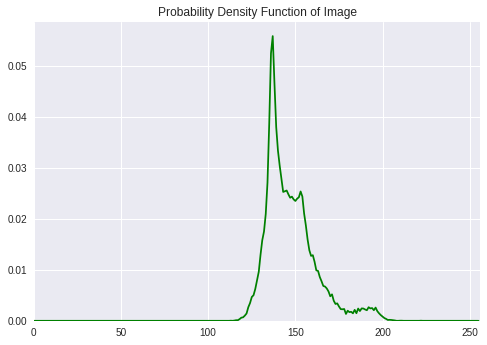

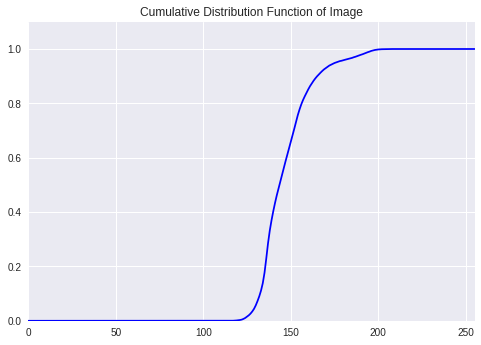

In [12]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

path = "CV-Assignment-1-Dataset/Hist1.jpg"

L = 2**8

def show_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()
  
def show_gray_image(image):
  plt.axis('off')
  plt.imshow(image, cmap = 'gray')
  plt.show()
  
def get_hist(image):
  hist = [0] * L
  
  for index, pixel in np.ndenumerate(image):
    hist[pixel] += 1
    
  return hist
  
def get_pdf(image):
  hist = [0] * L
  hist = get_hist(image)
  
  pdf = [0] * L
  height = 0
  width = 0
  size = 0
  (height, width) = image.shape[:2]
  size = height * width

  for i in range(0, L):
    pdf[i] = hist[i] / size
  
  return pdf
  
def get_cdf(image):
  pdf = [0] * L
  pdf = get_pdf(image)
  cdf = [0] * L
  
  for i in range(0, L):
    cdf[i] = cdf[i - 1] + pdf[i]
    
  return cdf
  
def show_hist(image):
  plt.plot(get_hist(image), color = 'r')
  plt.xlim([0, L])
  plt.ylim(ymin=0)
  plt.title("Histogram of Image")
  plt.show()

def show_hist_bins(image, bins=L):
  data = []
  if bins > L:
    bins = L
  for index, pixel in np.ndenumerate(image):
    data.append(pixel)
  plt.hist(data, bins=bins, range=[0, L-1])
  plt.title("Histogram of Image with " + str(bins) + " bins")
  plt.show()
  
def show_pdf(image):
  plt.plot(get_pdf(image), color = 'g')
  plt.xlim([0, L])
  plt.ylim(ymin=0)
  plt.title("Probability Density Function of Image")
  plt.show()
  
def show_cdf(image):
  plt.plot(get_cdf(image), color = 'b')
  plt.ylim(ymin=0, ymax=1.1)
  plt.xlim([0, L - 1])
  plt.title("Cumulative Distribution Function of Image")
  plt.show()
  
image = cv2.imread(path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Original Image
# show_image(image)

# Gray Image
show_gray_image(gray_image)

# Histogram
show_hist(gray_image)

show_hist_bins(gray_image, 256)
show_hist_bins(gray_image, 64)

# PDF
show_pdf(gray_image)

# CDF
show_cdf(gray_image)

### Using `matplotlib`

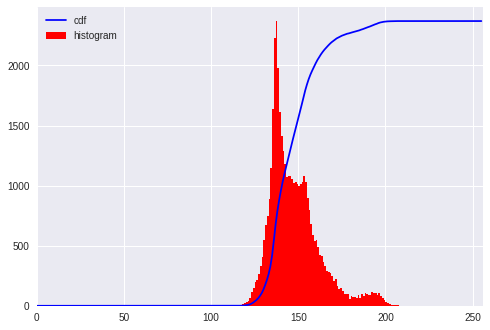

In [6]:
img = cv2.imread(path,0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Step 4: Histogram Equalization

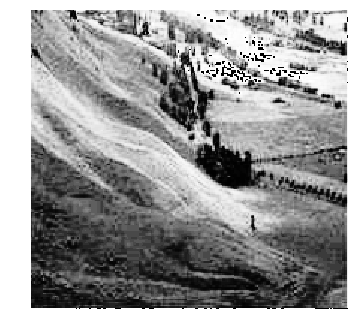

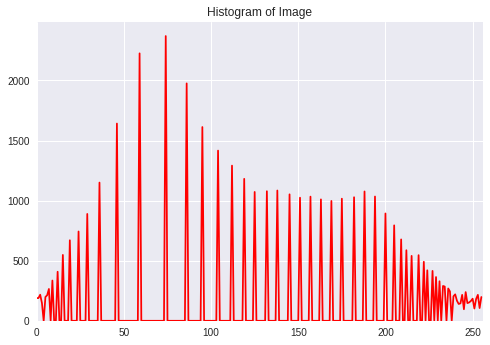

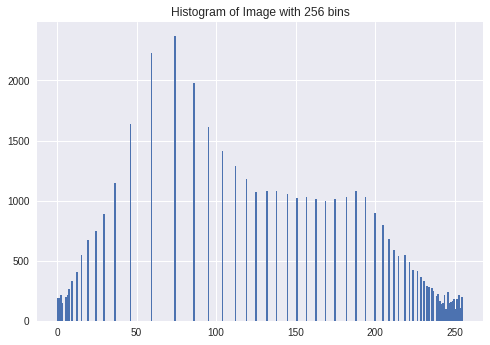

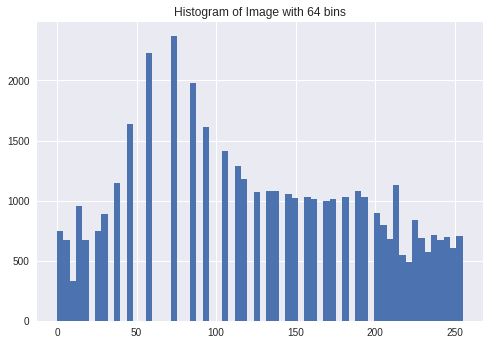

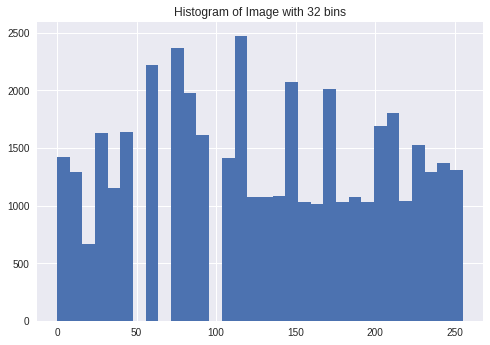

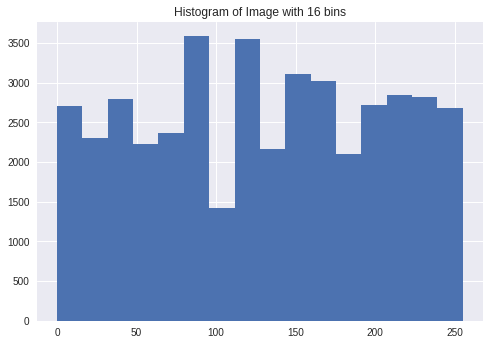

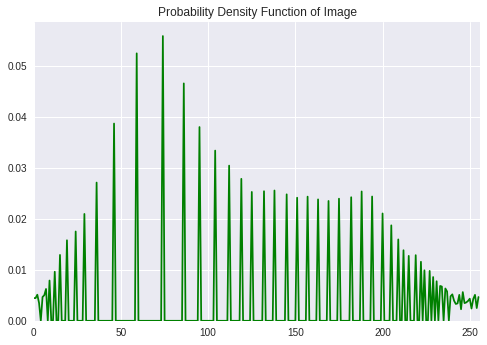

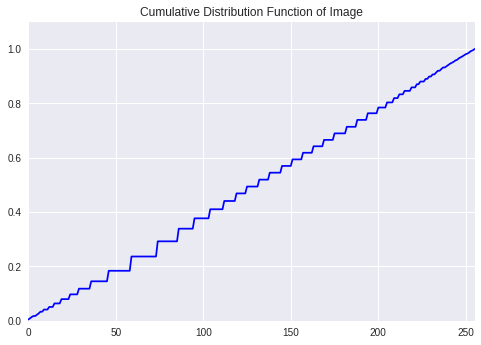

In [10]:
mapping = [0] * L

cdf = get_cdf(gray_image)

for i in range(0, L):
  mapping[i] = int(round(cdf[i] * L))

for index, pixel in np.ndenumerate(gray_image):
    gray_image[index] = mapping[pixel]

# Image
show_gray_image(gray_image)

# Histogram
show_hist(gray_image)

show_hist_bins(gray_image, 256)
show_hist_bins(gray_image, 64)
show_hist_bins(gray_image, 32)
show_hist_bins(gray_image, 16)


# PDF
show_pdf(gray_image)

# CDF
show_cdf(gray_image)

### Using `matplotlib`

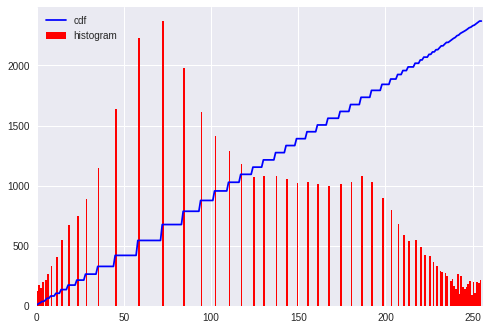

In [8]:
img = cv2.imread(path,0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Step 5: Histogram Matching

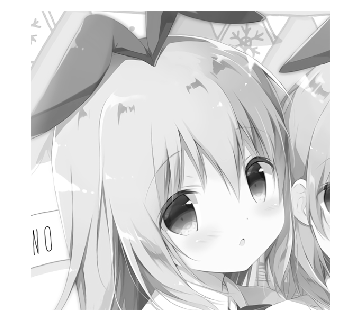

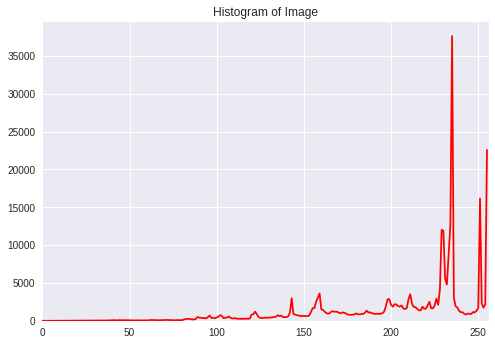

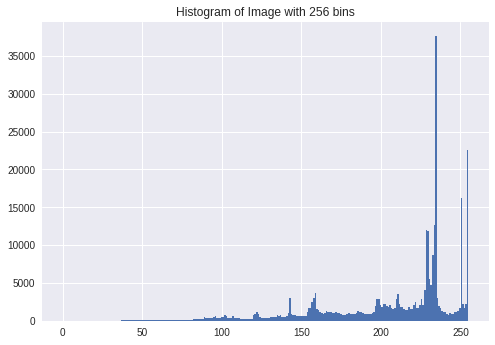

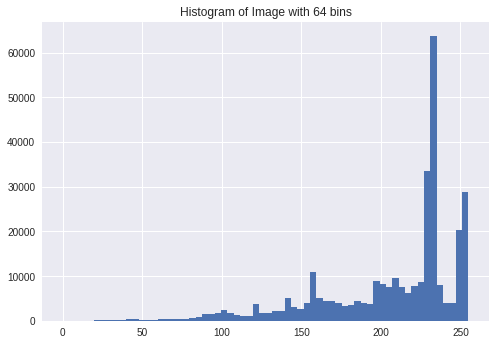

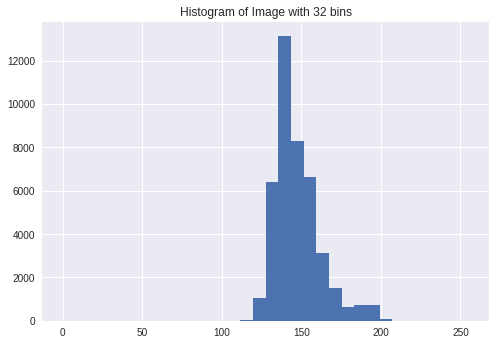

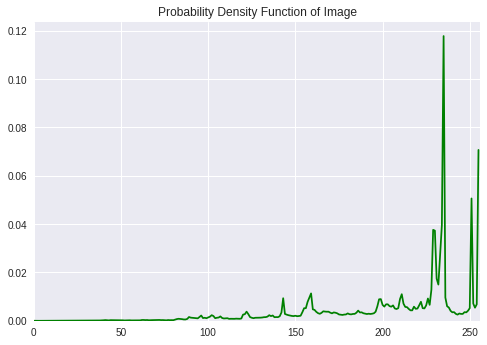

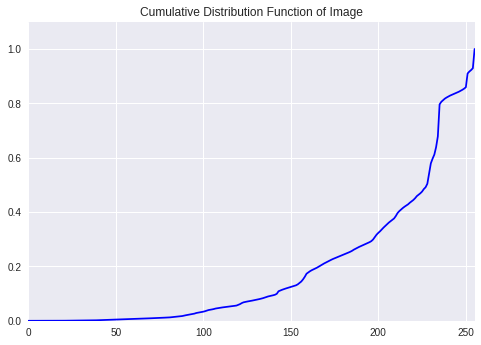

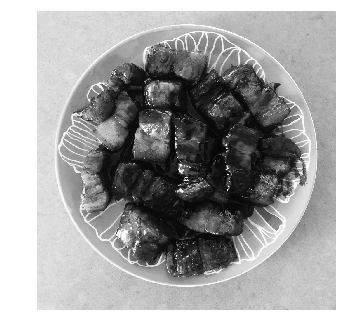

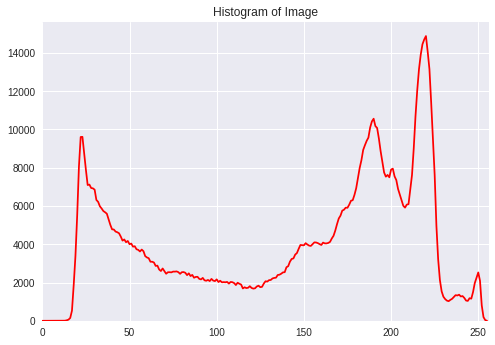

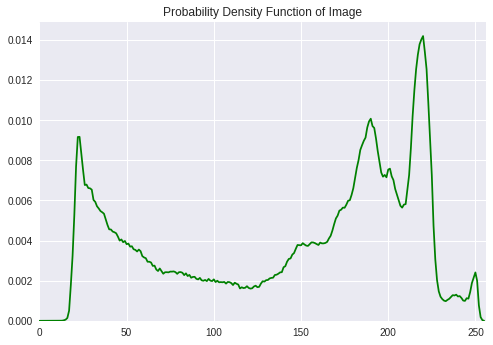

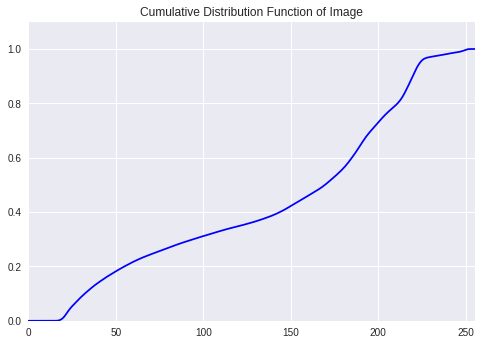

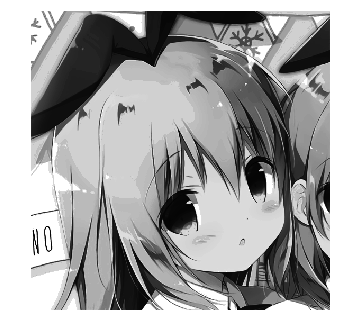

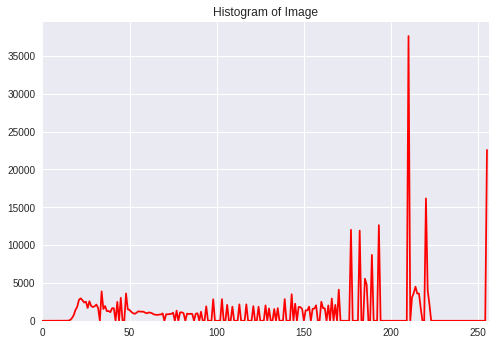

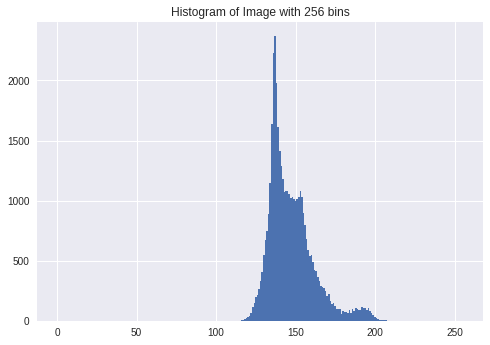

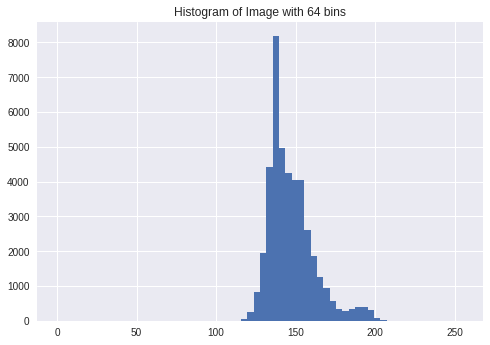

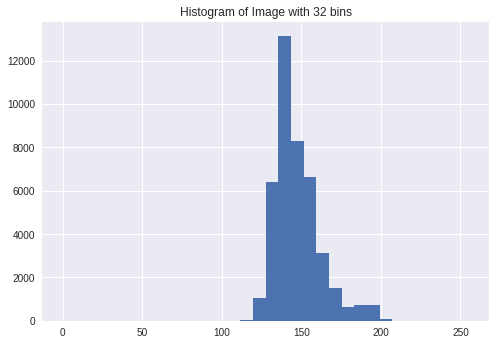

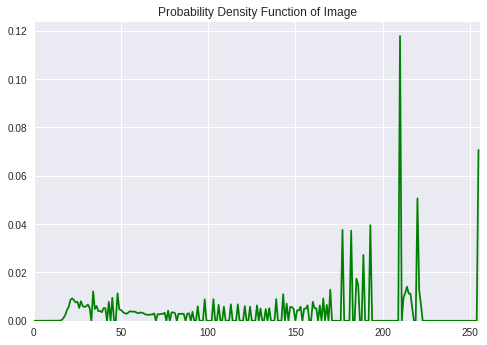

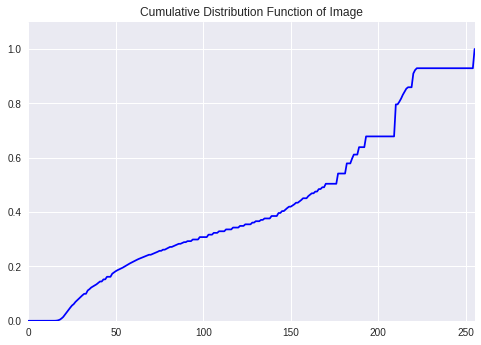

In [18]:
import math

path1 = "CV-Assignment-1-Dataset/chino.png"
path2 = "CV-Assignment-1-Dataset/images/Pork/Original.jpg"

image1 = cv2.imread(path1)
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = cv2.imread(path2)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

show_gray_image(gray_image1)
show_hist(gray_image1)
show_hist_bins(gray_image1, 256)
show_hist_bins(gray_image1, 64)
show_hist_bins(gray_image, 32)
show_pdf(gray_image1)
show_cdf(gray_image1)

show_gray_image(gray_image2)
show_hist(gray_image2)
show_pdf(gray_image2)
show_cdf(gray_image2)

pdf1 = get_pdf(gray_image1)
pdf2 = get_pdf(gray_image2)

cdf1 = get_cdf(gray_image1)
cdf2 = get_cdf(gray_image2)

mapping = [0] * L

for i in range(0, L):
  delta = 1
  for j in range(0, L):
    if math.fabs(cdf1[i] - cdf2[j]) < delta:
      delta = abs(cdf1[i] - cdf2[j])
      mapping[i] = j

for index, pixel in np.ndenumerate(gray_image1):
    gray_image1[index] = mapping[pixel]

show_gray_image(gray_image1)
show_hist(gray_image1)
show_hist_bins(gray_image, 256)
show_hist_bins(gray_image, 64)
show_hist_bins(gray_image, 32)
show_pdf(gray_image1)
show_cdf(gray_image1)